# pretty Petri

Previo a empezar con  el ciclo de entrenamiento, hay que hacer una introduccion de conceptos.
Le iba a llamar pre-Petri. Pero me parecio acertado lode pretty, porque se trata de poner bonitas las imagenes de entrada

https://github.com/jdmelendez/placas-de-petri-DeepLearning



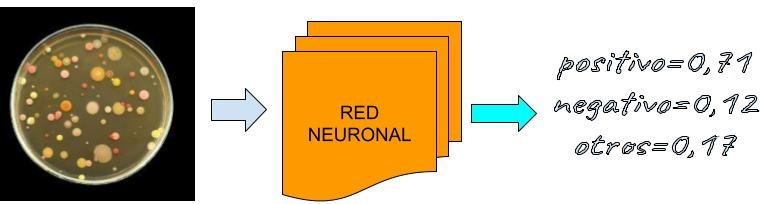

In [1]:

# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
%matplotlib inline

Image(filename="./prePetri.jpg")

# Imaginar una neuronal como una caja negra.
No tienes idea de lo que hay dentro, pero como puedes ver en este ejemplo, tenemos una imagen de entrada de cualquier tamaño, formato o color y la salida de la red son tres números entre 0 y 1 donde cada salida corresponde a la probabilidad de que la imagen de entrada sea un
*  "positivo"
*  "negativo"
*  otra categoría que simplemente llamamos "Otro"

  Los términos de la categoria son indiferente.s 

Si quieres podemos llamarlos perro, gato y otros. De hecho los llamaré así por evitar confusiones con los términos positivo y negativo. 
Son solo unas categorías de clasificación. Una imagen es de una categoría o de otra
Nos referiremos a estas categorías como etiquetas o etiquetas de clase. 

# Comprensión de la salida de las redes neuronales

Este problema en particular se denomina clasificación de imágenes, en la que la entrada es una imagen y la salida es un valor numérico para cada una de las tres clases posiblesP para ser claros, las salidas de la red son tres valores numéricos (no las etiquetas ens.
í
 .
En este ejemplo, la red produ,71,0,12 y 0,171ª. 
Las tres salidas suman uno, ya que representan probabilidades. 
Dado que la primera salida tiene la probabilidad más alta, decimos que la red predijo que la imagen de entrada era positiva (un gato)
De manera más general, la etiqueta asignada a la imagen de entrada se calcula seleccionando la etiqueta asociada con la probabilidad máxima de las tres sal
i# Santo, si las salidas fueran .51, .4 
mente, aún asignaríamos la etiqueta predicha como un gato, ya que .51 todavía representa la probabilidad más alta de las tres catego
# icción.
Una red neuronal perfecta emitiría
 (1,0,0) si la imagen de entrada es un gato y del mismo modo (0,1,0) si la imagen de entrada es un perro, y finalmente (0,0,1) si la imagen no es un gato o un perro. 
En realidad, incluso las redes bien entrenadas no dan resultados tan perfectos. En la práctica, las redes neuronales que realizan la clasificación de imágenes pueden tener cientos de categorías posibles (no solo tres, como se muestra aquí), pero el proceso para asignar las etiquetas de clase es ede entrada.

.



# Comprensión de la entrada de las redes neuronales

* Las imágenes en escala de grises se representan como una matriz de valores de píxel donde cada valor de píxel representa una intensidad de negro puro a blanco puro.
* Las imágenes en color son muy similares, excepto que tienen tres componentes para cada píxel que representan la intensidad de color para el rojo, el verde y el azul, respectivamente. Así, en este caso, una imagen en color de 256 x 256 está representada por 196.608 números.

.




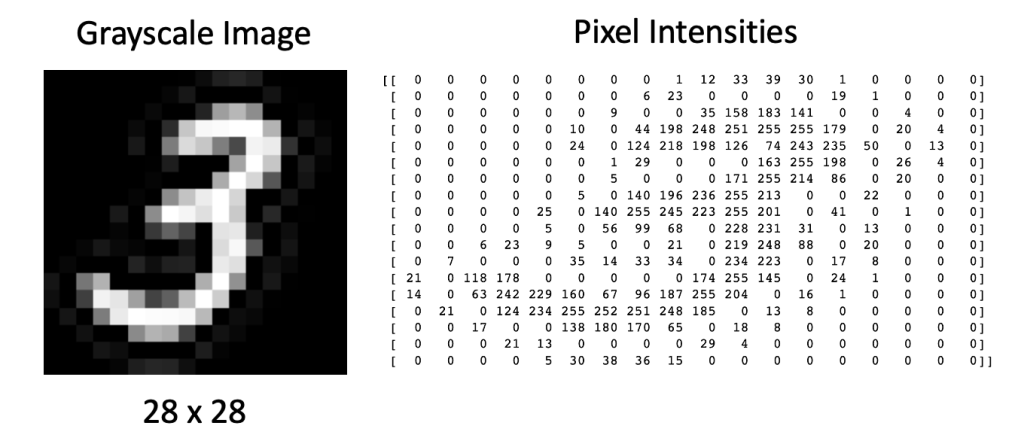

In [2]:
Image(filename="./blanconegro.png")


# Dependiendo del tipo de red 
los datos podrían representarse como un vector 1D o algo más compacto como tres matrices 2D donde cada matriz es 256×256. Un diseño de red particular esperará un tamaño y una forma fijos para los datos.
#  qué sucede si nuestra imagen de entrada es de otro tamaño o resulta ser una imagen en escala de grise 
En tales casos, podemos transformar la imagen cambiando su tamaño o recortándola al tamaño esperado
.#  
Si la imagen es en escala de gri.
P, podemos acomodarla replicando el único canal en escala de grises para hacer tres canales idénticos. 
Algunas redes solo pueden estar diseñadas para aceptar imágenes en escala de grises, en cuyo caso las imágenes en color se pueden convertir a escala de grises como paso previo al procesamiento para crear una imagen de entrada adecuada para la re# C que cuando se diseñan redes neuronales, se hacen para que acepten un cierto tamaño y (shape) forma para la e
rLe todo lo que tenemos que hacer es preprocesar nuestras imágenes para que se ajusten al tamaño y la forma requeridos por cualquier red en particular.



In [4]:



def MuySimple():
    print(cv2)

    # Read image
    oim = cv2.imread("petri1.jpg") #, cv2.IMREAD_GRAYSCALE)

    im = cv2.inRange(oim, (5,5,1), (200,205,205))

    ## convertir la imagen a escala de grises
    #im = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    '''
    Clase para extraer blobs de una imagen. :
    https://docs.opencv.org/3.4/d0/d7a/classcv_1_1SimpleBlobDetector.html
    La clase implementa un algoritmo simple para extraer blobs de una imagen:
    '''
    # Setup SimpleBlobDetector .
    params = cv2.SimpleBlobDetector_Params()

    #  thresholds- Umbrales
    params.minThreshold = 10
    params.maxThreshold = 200


    # Filtro de Area.
    params.filterByArea = True
    params.minArea = 100

    #  Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.1

    #  Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.57
    
    # Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.01

    # Create  detector 
    ver = (cv2.__version__).split('.')
    if int(ver[0]) < 3 :
    	detector = cv2.SimpleBlobDetector(params)
    else : 
    	detector = cv2.SimpleBlobDetector_create(params)


    # Detecta blobs.
    keypoints = detector.detect(im)

    # dibuja blobs  detectaddos
    

    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(15, 15))
    plt.imshow(im_with_keypoints,interpolation='nearest')
    cv2.imshow("Keypoints", im_with_keypoints)
    cv2.waitKey(0)

MuySimple()

# Show blobs
# cv2.imshow( im_with_keypoints)
#cv2.imshow("Keypoints", im_with_keypoints)
#cv2.waitKey(0)



<module 'cv2' (<_frozen_importlib_external.NamespaceLoader object at 0x000002DE8A067E90>)>


AttributeError: module 'cv2' has no attribute 'imread'

In [ ]:
!pip uninstall opencv-python-headless -y 
!pip install opencv-python --upgrade
